In [1]:
import time
import numpy as np
import pandas as pd

In [2]:
import tensorflow.python.keras as keras
from tensorflow.python.keras.layers import Layer
import tensorflow as tf
import dan_models
import dan_utils

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
class_set = [2, 3, 4]
v, v_class, id_402, part1, part2, seg, det_list_class, near_road_set  \
        = dan_utils.load_data(class_set, res=11, randseed=25)

There are 5 class(es)


C:\Users\10169\anaconda3\envs\dan_traff\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
# ind, class
# 0  , blue
# 1  , green
# 2  , yellow  <--
# 3  , black   <--
# 4  , red     <--
class_color_set = ['b', 'g', 'y', 'black', 'r']
class_i = 2

near_road = np.array(near_road_set[class_i])
flow = v_class[class_i].iloc[:, 2:-1]

prop = 0.3  # proportion of training data
from_day = 22
to_day = 31
num_links = v_class[class_i].shape[0]

image_train, image_test, day_train, day_test, label_train, label_test\
= dan_utils.sliding_window(
    flow, near_road, from_day, to_day, prop, num_links
)

t_input = image_train.shape[2]
t_pre = label_train.shape[2]
k = image_train.shape[1]

(1008, 5, 12, 40)
(302, 5, 12, 40)
(706, 5, 12, 40)
(302, 40, 6)
(706, 40, 6)


In [6]:
input_data = keras.Input(shape=(k,t_input,num_links), name='input_data')
input_HA = keras.Input(shape=(num_links, t_pre), name='input_HA')

finish_model = dan_models.build_model(input_data, input_HA)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 5, 12, 40)]  0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 5, 12, 40)    160         input_data[0][0]                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 5, 12, 40)    14440       batch_normalization[0][0]        
__________________________________________________________________________________________________
average_pooling2d (AveragePooli (None, 5, 12, 40)    0           conv2d[0][0]                     
______________________________________________________________________________________________

In [7]:
finish_model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
X_train = image_train
X_HA_train = day_train
label_train = label_train

In [9]:
#模型拟合与评估
finish_model.fit([X_train,X_HA_train], label_train, epochs=1500, batch_size=2048,
validation_data=([image_test,day_test], label_test))
# finish_model.evaluate(image_test, label_test)

Epoch 1/1500
1/1 [==============================] - 6s 6s/step - loss: 264530.5000 - val_loss: 271987.4688
Epoch 2/1500
1/1 [==============================] - 0s 46ms/step - loss: 263998.9688 - val_loss: 271344.6875
Epoch 3/1500
1/1 [==============================] - 0s 45ms/step - loss: 263463.3750 - val_loss: 270634.8125
Epoch 4/1500
1/1 [==============================] - 0s 44ms/step - loss: 262921.5938 - val_loss: 269847.4688
Epoch 5/1500
1/1 [==============================] - 0s 43ms/step - loss: 262372.0625 - val_loss: 268971.2812
Epoch 6/1500
1/1 [==============================] - 0s 43ms/step - loss: 261812.4219 - val_loss: 267980.9062
Epoch 7/1500
1/1 [==============================] - 0s 40ms/step - loss: 261241.5156 - val_loss: 266870.1250
Epoch 8/1500
1/1 [==============================] - 0s 45ms/step - loss: 260656.7656 - val_loss: 265634.0625
Epoch 9/1500
1/1 [==============================] - 0s 41ms/step - loss: 260054.7812 - val_loss: 264227.9688
Epoch 10/1500
1/1 [==

1/1 [==============================] - 0s 43ms/step - loss: 109631.0859 - val_loss: 125144.0703
Epoch 76/1500
1/1 [==============================] - 0s 43ms/step - loss: 108911.3438 - val_loss: 117060.6484
Epoch 77/1500
1/1 [==============================] - 0s 43ms/step - loss: 108282.2812 - val_loss: 113932.6250
Epoch 78/1500
1/1 [==============================] - 0s 42ms/step - loss: 107970.0156 - val_loss: 113443.8672
Epoch 79/1500
1/1 [==============================] - 0s 45ms/step - loss: 106753.3594 - val_loss: 113239.6562
Epoch 80/1500
1/1 [==============================] - 0s 43ms/step - loss: 106611.7500 - val_loss: 119024.9609
Epoch 81/1500
1/1 [==============================] - 0s 47ms/step - loss: 106050.7656 - val_loss: 113920.9844
Epoch 82/1500
1/1 [==============================] - 0s 43ms/step - loss: 105265.2500 - val_loss: 112759.7656
Epoch 83/1500
1/1 [==============================] - 0s 42ms/step - loss: 104754.6719 - val_loss: 114456.1953
Epoch 84/1500
1/1 [=====

1/1 [==============================] - 0s 43ms/step - loss: 85868.0938 - val_loss: 111176.0312
Epoch 150/1500
1/1 [==============================] - 0s 43ms/step - loss: 85623.6406 - val_loss: 110410.0938
Epoch 151/1500
1/1 [==============================] - 0s 43ms/step - loss: 85398.5156 - val_loss: 110679.1016
Epoch 152/1500
1/1 [==============================] - 0s 40ms/step - loss: 85393.3594 - val_loss: 112957.4062
Epoch 153/1500
1/1 [==============================] - 0s 41ms/step - loss: 84935.5938 - val_loss: 115083.5156
Epoch 154/1500
1/1 [==============================] - 0s 43ms/step - loss: 84841.0859 - val_loss: 114945.3750
Epoch 155/1500
1/1 [==============================] - 0s 43ms/step - loss: 84457.8359 - val_loss: 113583.4766
Epoch 156/1500
1/1 [==============================] - 0s 42ms/step - loss: 84468.0156 - val_loss: 111520.3828
Epoch 157/1500
1/1 [==============================] - 0s 43ms/step - loss: 84125.7188 - val_loss: 109875.6562
Epoch 158/1500
1/1 [=====

1/1 [==============================] - 0s 43ms/step - loss: 73058.7891 - val_loss: 98305.6875
Epoch 224/1500
1/1 [==============================] - 0s 42ms/step - loss: 72907.9844 - val_loss: 98329.2656
Epoch 225/1500
1/1 [==============================] - 0s 43ms/step - loss: 72895.6328 - val_loss: 98379.7031
Epoch 226/1500
1/1 [==============================] - 0s 42ms/step - loss: 72708.1172 - val_loss: 97942.7734
Epoch 227/1500
1/1 [==============================] - 0s 42ms/step - loss: 72465.8125 - val_loss: 96730.3984
Epoch 228/1500
1/1 [==============================] - 0s 40ms/step - loss: 72417.4453 - val_loss: 96493.6406
Epoch 229/1500
1/1 [==============================] - 0s 41ms/step - loss: 72122.2812 - val_loss: 96511.2656
Epoch 230/1500
1/1 [==============================] - 0s 43ms/step - loss: 72040.9531 - val_loss: 96108.7109
Epoch 231/1500
1/1 [==============================] - 0s 43ms/step - loss: 71914.2266 - val_loss: 96606.6719
Epoch 232/1500
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 62135.1836 - val_loss: 81823.1484
Epoch 299/1500
1/1 [==============================] - 0s 43ms/step - loss: 62096.8086 - val_loss: 82650.7656
Epoch 300/1500
1/1 [==============================] - 0s 43ms/step - loss: 61919.3594 - val_loss: 82177.3125
Epoch 301/1500
1/1 [==============================] - 0s 39ms/step - loss: 61766.8359 - val_loss: 80427.8828
Epoch 302/1500
1/1 [==============================] - 0s 43ms/step - loss: 61774.0977 - val_loss: 80257.9219
Epoch 303/1500
1/1 [==============================] - 0s 43ms/step - loss: 61521.9727 - val_loss: 80343.9141
Epoch 304/1500
1/1 [==============================] - 0s 43ms/step - loss: 61402.9688 - val_loss: 79540.1250
Epoch 305/1500
1/1 [==============================] - 0s 43ms/step - loss: 61180.2266 - val_loss: 79419.6641
Epoch 306/1500
1/1 [==============================] - 0s 43ms/step - loss: 61151.4023 - val_loss: 80524.3750
Epoch 307/1500
1/1 [==============

1/1 [==============================] - 0s 40ms/step - loss: 52378.4062 - val_loss: 66715.1016
Epoch 374/1500
1/1 [==============================] - 0s 43ms/step - loss: 52217.7383 - val_loss: 65905.9219
Epoch 375/1500
1/1 [==============================] - 0s 41ms/step - loss: 52089.9180 - val_loss: 65680.2266
Epoch 376/1500
1/1 [==============================] - 0s 43ms/step - loss: 51991.5977 - val_loss: 65847.1797
Epoch 377/1500
1/1 [==============================] - 0s 43ms/step - loss: 51892.6719 - val_loss: 65699.6172
Epoch 378/1500
1/1 [==============================] - 0s 43ms/step - loss: 51785.3945 - val_loss: 65446.9805
Epoch 379/1500
1/1 [==============================] - 0s 42ms/step - loss: 51682.5430 - val_loss: 65115.8906
Epoch 380/1500
1/1 [==============================] - 0s 42ms/step - loss: 51495.7148 - val_loss: 64914.4766
Epoch 381/1500
1/1 [==============================] - 0s 42ms/step - loss: 51425.5156 - val_loss: 64893.8516
Epoch 382/1500
1/1 [==============

1/1 [==============================] - 0s 44ms/step - loss: 43806.0547 - val_loss: 53889.4883
Epoch 449/1500
1/1 [==============================] - 0s 43ms/step - loss: 43712.7930 - val_loss: 53752.9336
Epoch 450/1500
1/1 [==============================] - 0s 46ms/step - loss: 43612.1016 - val_loss: 53806.0664
Epoch 451/1500
1/1 [==============================] - 0s 43ms/step - loss: 43510.5898 - val_loss: 53629.4570
Epoch 452/1500
1/1 [==============================] - 0s 41ms/step - loss: 43370.9570 - val_loss: 53565.0547
Epoch 453/1500
1/1 [==============================] - 0s 43ms/step - loss: 43295.3516 - val_loss: 53669.7891
Epoch 454/1500
1/1 [==============================] - 0s 45ms/step - loss: 43205.4180 - val_loss: 53617.2461
Epoch 455/1500
1/1 [==============================] - 0s 44ms/step - loss: 43066.6484 - val_loss: 53176.1172
Epoch 456/1500
1/1 [==============================] - 0s 42ms/step - loss: 42967.7266 - val_loss: 52969.5000
Epoch 457/1500
1/1 [==============

1/1 [==============================] - 0s 45ms/step - loss: 36616.3086 - val_loss: 44990.2578
Epoch 524/1500
1/1 [==============================] - 0s 43ms/step - loss: 36569.2188 - val_loss: 45175.8945
Epoch 525/1500
1/1 [==============================] - 0s 42ms/step - loss: 36436.6523 - val_loss: 46103.6133
Epoch 526/1500
1/1 [==============================] - 0s 43ms/step - loss: 36410.9922 - val_loss: 45802.8203
Epoch 527/1500
1/1 [==============================] - 0s 43ms/step - loss: 36243.7070 - val_loss: 45245.5508
Epoch 528/1500
1/1 [==============================] - 0s 43ms/step - loss: 36174.0664 - val_loss: 45151.4648
Epoch 529/1500
1/1 [==============================] - 0s 43ms/step - loss: 36077.9023 - val_loss: 45093.2227
Epoch 530/1500
1/1 [==============================] - 0s 43ms/step - loss: 36052.3086 - val_loss: 44635.8125
Epoch 531/1500
1/1 [==============================] - 0s 43ms/step - loss: 35919.1406 - val_loss: 44317.3047
Epoch 532/1500
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 30521.4199 - val_loss: 39801.4648
Epoch 599/1500
1/1 [==============================] - 0s 39ms/step - loss: 30474.6191 - val_loss: 38963.8242
Epoch 600/1500
1/1 [==============================] - 0s 42ms/step - loss: 30379.7871 - val_loss: 38742.8984
Epoch 601/1500
1/1 [==============================] - 0s 43ms/step - loss: 30349.7559 - val_loss: 38891.0039
Epoch 602/1500
1/1 [==============================] - 0s 43ms/step - loss: 30282.0371 - val_loss: 38835.1016
Epoch 603/1500
1/1 [==============================] - 0s 42ms/step - loss: 30166.8770 - val_loss: 39003.3555
Epoch 604/1500
1/1 [==============================] - 0s 43ms/step - loss: 30131.5566 - val_loss: 39324.9727
Epoch 605/1500
1/1 [==============================] - 0s 42ms/step - loss: 30005.1328 - val_loss: 39457.0742
Epoch 606/1500
1/1 [==============================] - 0s 42ms/step - loss: 29933.6133 - val_loss: 38889.9961
Epoch 607/1500
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 25395.7324 - val_loss: 34000.0781
Epoch 674/1500
1/1 [==============================] - 0s 44ms/step - loss: 25288.7129 - val_loss: 33745.7695
Epoch 675/1500
1/1 [==============================] - 0s 39ms/step - loss: 25234.6641 - val_loss: 33638.6484
Epoch 676/1500
1/1 [==============================] - 0s 44ms/step - loss: 25140.6699 - val_loss: 33639.4609
Epoch 677/1500
1/1 [==============================] - 0s 43ms/step - loss: 25098.2988 - val_loss: 33509.6562
Epoch 678/1500
1/1 [==============================] - 0s 40ms/step - loss: 25034.5117 - val_loss: 33555.3594
Epoch 679/1500
1/1 [==============================] - 0s 42ms/step - loss: 24959.2852 - val_loss: 33578.8086
Epoch 680/1500
1/1 [==============================] - 0s 43ms/step - loss: 24899.8359 - val_loss: 33326.3750
Epoch 681/1500
1/1 [==============================] - 0s 41ms/step - loss: 24812.9160 - val_loss: 33175.6328
Epoch 682/1500
1/1 [==============

1/1 [==============================] - 0s 41ms/step - loss: 20908.1855 - val_loss: 28726.4043
Epoch 749/1500
1/1 [==============================] - 0s 44ms/step - loss: 20875.4102 - val_loss: 28670.4785
Epoch 750/1500
1/1 [==============================] - 0s 41ms/step - loss: 20818.1758 - val_loss: 28432.5996
Epoch 751/1500
1/1 [==============================] - 0s 43ms/step - loss: 20766.3223 - val_loss: 28590.4922
Epoch 752/1500
1/1 [==============================] - 0s 43ms/step - loss: 20706.3574 - val_loss: 28849.6230
Epoch 753/1500
1/1 [==============================] - 0s 43ms/step - loss: 20662.2812 - val_loss: 28524.6211
Epoch 754/1500
1/1 [==============================] - 0s 39ms/step - loss: 20555.2188 - val_loss: 28244.2246
Epoch 755/1500
1/1 [==============================] - 0s 43ms/step - loss: 20569.0469 - val_loss: 27861.5234
Epoch 756/1500
1/1 [==============================] - 0s 43ms/step - loss: 20474.2246 - val_loss: 27817.2637
Epoch 757/1500
1/1 [==============

1/1 [==============================] - 0s 41ms/step - loss: 17305.1055 - val_loss: 24288.9062
Epoch 824/1500
1/1 [==============================] - 0s 42ms/step - loss: 17243.9043 - val_loss: 24261.5996
Epoch 825/1500
1/1 [==============================] - 0s 43ms/step - loss: 17194.2910 - val_loss: 24406.1582
Epoch 826/1500
1/1 [==============================] - 0s 44ms/step - loss: 17119.6016 - val_loss: 24930.2344
Epoch 827/1500
1/1 [==============================] - 0s 43ms/step - loss: 17166.5879 - val_loss: 24847.8125
Epoch 828/1500
1/1 [==============================] - 0s 43ms/step - loss: 17021.6680 - val_loss: 24743.6680
Epoch 829/1500
1/1 [==============================] - 0s 40ms/step - loss: 17038.0645 - val_loss: 24722.6660
Epoch 830/1500
1/1 [==============================] - 0s 42ms/step - loss: 16949.7266 - val_loss: 24985.0957
Epoch 831/1500
1/1 [==============================] - 0s 42ms/step - loss: 16939.5703 - val_loss: 24753.6055
Epoch 832/1500
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 14041.2090 - val_loss: 22338.9922
Epoch 899/1500
1/1 [==============================] - 0s 42ms/step - loss: 14022.8809 - val_loss: 22089.7988
Epoch 900/1500
1/1 [==============================] - 0s 43ms/step - loss: 14007.3359 - val_loss: 21720.2090
Epoch 901/1500
1/1 [==============================] - 0s 43ms/step - loss: 13907.2812 - val_loss: 21813.6484
Epoch 902/1500
1/1 [==============================] - 0s 46ms/step - loss: 13947.5713 - val_loss: 21478.6660
Epoch 903/1500
1/1 [==============================] - 0s 43ms/step - loss: 13869.5488 - val_loss: 21617.8066
Epoch 904/1500
1/1 [==============================] - 0s 42ms/step - loss: 13948.4922 - val_loss: 21737.1719
Epoch 905/1500
1/1 [==============================] - 0s 40ms/step - loss: 13814.7627 - val_loss: 22002.9570
Epoch 906/1500
1/1 [==============================] - 0s 44ms/step - loss: 13778.4424 - val_loss: 21830.4727
Epoch 907/1500
1/1 [==============

1/1 [==============================] - 0s 44ms/step - loss: 11619.4248 - val_loss: 19237.8340
Epoch 974/1500
1/1 [==============================] - 0s 45ms/step - loss: 11602.4658 - val_loss: 19420.5410
Epoch 975/1500
1/1 [==============================] - 0s 43ms/step - loss: 11534.2539 - val_loss: 19746.1113
Epoch 976/1500
1/1 [==============================] - 0s 42ms/step - loss: 11512.2461 - val_loss: 19912.9570
Epoch 977/1500
1/1 [==============================] - 0s 43ms/step - loss: 11515.8037 - val_loss: 19739.0977
Epoch 978/1500
1/1 [==============================] - 0s 44ms/step - loss: 11453.8408 - val_loss: 19644.2812
Epoch 979/1500
1/1 [==============================] - 0s 41ms/step - loss: 11460.4639 - val_loss: 19558.5078
Epoch 980/1500
1/1 [==============================] - 0s 45ms/step - loss: 11403.0176 - val_loss: 19546.2500
Epoch 981/1500
1/1 [==============================] - 0s 45ms/step - loss: 11402.8848 - val_loss: 19569.0508
Epoch 982/1500
1/1 [==============

Epoch 1048/1500
1/1 [==============================] - 0s 40ms/step - loss: 9646.5801 - val_loss: 18715.2188
Epoch 1049/1500
1/1 [==============================] - 0s 43ms/step - loss: 9600.0195 - val_loss: 18569.8555
Epoch 1050/1500
1/1 [==============================] - 0s 42ms/step - loss: 9640.4697 - val_loss: 18049.6797
Epoch 1051/1500
1/1 [==============================] - 0s 43ms/step - loss: 9565.8848 - val_loss: 17899.9336
Epoch 1052/1500
1/1 [==============================] - 0s 42ms/step - loss: 9536.0508 - val_loss: 17876.5527
Epoch 1053/1500
1/1 [==============================] - 0s 41ms/step - loss: 9527.7236 - val_loss: 17886.5195
Epoch 1054/1500
1/1 [==============================] - 0s 44ms/step - loss: 9511.6641 - val_loss: 17907.8633
Epoch 1055/1500
1/1 [==============================] - 0s 45ms/step - loss: 9476.3779 - val_loss: 17880.0938
Epoch 1056/1500
1/1 [==============================] - 0s 43ms/step - loss: 9483.1533 - val_loss: 18204.0625
Epoch 1057/1500
1/1

1/1 [==============================] - 0s 44ms/step - loss: 8069.8032 - val_loss: 16712.4414
Epoch 1124/1500
1/1 [==============================] - 0s 42ms/step - loss: 8075.0884 - val_loss: 17362.2812
Epoch 1125/1500
1/1 [==============================] - 0s 48ms/step - loss: 8029.7378 - val_loss: 17685.9707
Epoch 1126/1500
1/1 [==============================] - 0s 48ms/step - loss: 8021.4355 - val_loss: 17571.1934
Epoch 1127/1500
1/1 [==============================] - 0s 47ms/step - loss: 7993.3418 - val_loss: 17627.4453
Epoch 1128/1500
1/1 [==============================] - 0s 42ms/step - loss: 7993.9775 - val_loss: 17199.5586
Epoch 1129/1500
1/1 [==============================] - 0s 44ms/step - loss: 7971.6953 - val_loss: 16576.2070
Epoch 1130/1500
1/1 [==============================] - 0s 44ms/step - loss: 7945.0908 - val_loss: 16231.0322
Epoch 1131/1500
1/1 [==============================] - 0s 45ms/step - loss: 7941.6646 - val_loss: 16665.4336
Epoch 1132/1500
1/1 [==============

1/1 [==============================] - 0s 44ms/step - loss: 6847.2012 - val_loss: 14480.0664
Epoch 1199/1500
1/1 [==============================] - 0s 45ms/step - loss: 6851.7046 - val_loss: 14918.2480
Epoch 1200/1500
1/1 [==============================] - 0s 46ms/step - loss: 6832.1118 - val_loss: 14961.0479
Epoch 1201/1500
1/1 [==============================] - 0s 41ms/step - loss: 6813.5483 - val_loss: 14644.0908
Epoch 1202/1500
1/1 [==============================] - 0s 43ms/step - loss: 6794.6733 - val_loss: 14508.0762
Epoch 1203/1500
1/1 [==============================] - 0s 42ms/step - loss: 6822.2100 - val_loss: 14169.4473
Epoch 1204/1500
1/1 [==============================] - 0s 47ms/step - loss: 6797.5225 - val_loss: 14008.8799
Epoch 1205/1500
1/1 [==============================] - 0s 44ms/step - loss: 6762.9893 - val_loss: 14070.7773
Epoch 1206/1500
1/1 [==============================] - 0s 41ms/step - loss: 6750.9634 - val_loss: 13816.7793
Epoch 1207/1500
1/1 [==============

1/1 [==============================] - 0s 47ms/step - loss: 5936.9922 - val_loss: 14055.0576
Epoch 1274/1500
1/1 [==============================] - 0s 47ms/step - loss: 5952.0654 - val_loss: 13715.0273
Epoch 1275/1500
1/1 [==============================] - 0s 47ms/step - loss: 5949.0449 - val_loss: 13435.2520
Epoch 1276/1500
1/1 [==============================] - 0s 47ms/step - loss: 5900.2358 - val_loss: 13775.2139
Epoch 1277/1500
1/1 [==============================] - 0s 46ms/step - loss: 5912.6055 - val_loss: 13688.1455
Epoch 1278/1500
1/1 [==============================] - 0s 45ms/step - loss: 5885.4346 - val_loss: 13627.3242
Epoch 1279/1500
1/1 [==============================] - 0s 48ms/step - loss: 5890.7349 - val_loss: 13309.5273
Epoch 1280/1500
1/1 [==============================] - 0s 46ms/step - loss: 5832.8154 - val_loss: 13455.3994
Epoch 1281/1500
1/1 [==============================] - 0s 43ms/step - loss: 5844.4199 - val_loss: 13687.0811
Epoch 1282/1500
1/1 [==============

1/1 [==============================] - 0s 46ms/step - loss: 5207.9897 - val_loss: 13122.4570
Epoch 1349/1500
1/1 [==============================] - 0s 43ms/step - loss: 5211.3110 - val_loss: 13364.9756
Epoch 1350/1500
1/1 [==============================] - 0s 44ms/step - loss: 5172.3726 - val_loss: 13635.9805
Epoch 1351/1500
1/1 [==============================] - 0s 46ms/step - loss: 5165.0708 - val_loss: 12998.7676
Epoch 1352/1500
1/1 [==============================] - 0s 46ms/step - loss: 5172.1523 - val_loss: 12213.3115
Epoch 1353/1500
1/1 [==============================] - 0s 46ms/step - loss: 5151.0376 - val_loss: 11918.7568
Epoch 1354/1500
1/1 [==============================] - 0s 46ms/step - loss: 5132.6816 - val_loss: 12098.8955
Epoch 1355/1500
1/1 [==============================] - 0s 44ms/step - loss: 5166.5225 - val_loss: 12503.1094
Epoch 1356/1500
1/1 [==============================] - 0s 46ms/step - loss: 5127.7476 - val_loss: 12722.0713
Epoch 1357/1500
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 4631.1899 - val_loss: 11971.2021
Epoch 1424/1500
1/1 [==============================] - 0s 46ms/step - loss: 4649.0981 - val_loss: 11461.4775
Epoch 1425/1500
1/1 [==============================] - 0s 46ms/step - loss: 4666.6128 - val_loss: 11366.6221
Epoch 1426/1500
1/1 [==============================] - 0s 46ms/step - loss: 4647.0874 - val_loss: 11661.4346
Epoch 1427/1500
1/1 [==============================] - 0s 48ms/step - loss: 4631.9824 - val_loss: 12565.6133
Epoch 1428/1500
1/1 [==============================] - 0s 46ms/step - loss: 4644.2061 - val_loss: 12810.0576
Epoch 1429/1500
1/1 [==============================] - 0s 46ms/step - loss: 4635.0640 - val_loss: 12310.4502
Epoch 1430/1500
1/1 [==============================] - 0s 46ms/step - loss: 4627.9468 - val_loss: 11704.7773
Epoch 1431/1500
1/1 [==============================] - 0s 46ms/step - loss: 4590.8657 - val_loss: 11645.6514
Epoch 1432/1500
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 4236.9238 - val_loss: 11015.8213
Epoch 1499/1500
1/1 [==============================] - 0s 43ms/step - loss: 4258.3828 - val_loss: 10839.5781
Epoch 1500/1500
1/1 [==============================] - 0s 44ms/step - loss: 4250.6143 - val_loss: 10884.7139


In [10]:
#模型预测
model_pre = finish_model.predict([image_test,day_test])

In [11]:
#计算各项误差指标

m = 5
nrmse_mean = dan_utils.nrmse_loss_func(model_pre, label_test, m)
mape_mean = dan_utils.mape_loss_func(model_pre, label_test, m)
smape_mean = dan_utils.smape_loss_func(model_pre, label_test, m)
mae_mean = dan_utils.mae_loss_func(model_pre, label_test, m)

print('nrmse = ' + str(nrmse_mean) + '\n' + 'mape = ' + str(mape_mean) + '\n' + 'smape = ' + str(smape_mean) + '\n' + 'mae = ' + str(mae_mean))

nrmse = 0.09156491703366873
mape = 0.19002885053706925
smape = 0.18931426899363088
mae = 72.30687415073264


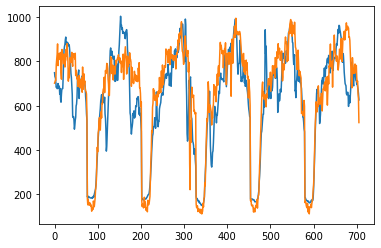

In [12]:
import matplotlib.pyplot as plt

plt.plot(model_pre[:, 0, 0])
plt.plot(label_test[:, 0, 0])

In [13]:
#模型保存
finish_model.save_weights('../model/base_ST-DTNN_%s_mape=%.5f_nrmse=%.5f.h5'%(class_color_set[class_i], mape_mean, nrmse_mean))
# finish_model.save_weights('../model/source_%s.h5'%(class_color_set[class_i]))